## [Lab 4] Linear Regression

  Linear regression is a fundamental statistical method used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables, allowing us to predict the value of the dependent variable based on the known values of the independent variables.


---

The goal of this lab session is focused on learning linear regression and interpreting its models. We will work with the real-world dataset, apply techniques to fit lines to data points, assess model performance, understand assumptions, and interpret results.

---
 Some of the useful and most important equations:


> Linear Regression Hypothesis : $h(x) = w_{0}+ w_{1}x$



> Linear Regression Model : $y(x) = 1 + 1\cdot x$




> First Partial Derivatives :
> $ \frac{\partial J}{\partial w_{0}} = \frac{1}{m} \sum_{i=1}^{m} (y'^{(i)}-y^{(i)}) $,
> $ \frac{\partial J}{\partial w_{1}} = \frac{1}{m} \sum_{i=1}^{m} (y'^{(i)}-y^{(i)}) \cdot x^{(i)} $



> For the purpose of this lab, we will use [this](https://drive.google.com/file/d/104Cz-K9qiZ0FWnanl09gUULn58M8vau1/view?usp=share_link) dataset. You can download it from the LMS or from the Google Drive link, and upload to your notebook.

> It only contains two columns: house price ($ y $) and size of the house ($ x $).


### 1.   Read and Write operations on a file
In order to analyze and work with our dataset, firstly, we need to read its content. You can use the following code snippet. Additionally, you can use the helper *is_number* function, to handle possible non-numeric values in the columns.

In [ ]:
def is_number(s):
    if s is None: return False
    try:
        complex(s)
    except ValueError:
        return False

    return True

def read_file(file_path):
    try:
        with open(file_path, 'r') as file:
            data = []
            lines = file.readlines()

            keys = lines[0].split(',')
            for i in range(1, len(lines)):
                data_row = [
                    float(cell.strip('\n')) if is_number(cell.strip('\n')) else cell.strip('\n')
                    for cell in lines[i].split(',')
                ]
                data.append(data_row)
            return data
    except FileNotFoundError:
        raise RuntimeError("File not found.")
    except Exception as e:
        raise RuntimeError(f"An error occurred: {e}")

In [ ]:
data = read_file('./sample_data/house_price.csv')
print(data)

[[2104.0, 399900.0], [1600.0, 329900.0], [2400.0, 369000.0], [1416.0, 232000.0], [3000.0, 539900.0], [1985.0, 299900.0], [1534.0, 314900.0], [1427.0, 198999.0], [1380.0, 212000.0], [1494.0, 242500.0], [1940.0, 239999.0], [2000.0, 347000.0], [1890.0, 329999.0], [4478.0, 699900.0], [1268.0, 259900.0], [2300.0, 449900.0], [1320.0, 299900.0], [1236.0, 199900.0], [2609.0, 499998.0], [3031.0, 599000.0], [1767.0, 252900.0], [1888.0, 255000.0], [1604.0, 242900.0], [1962.0, 259900.0], [3890.0, 573900.0], [1100.0, 249900.0], [1458.0, 464500.0], [2526.0, 469000.0], [2200.0, 475000.0], [2637.0, 299900.0], [1839.0, 349900.0], [1000.0, 169900.0], [2040.0, 314900.0], [3137.0, 579900.0], [1811.0, 285900.0], [1437.0, 249900.0], [1239.0, 229900.0], [2132.0, 345000.0], [4215.0, 549000.0], [2162.0, 287000.0], [1664.0, 368500.0], [2238.0, 329900.0], [2567.0, 314000.0], [1200.0, 299000.0], [852.0, 179900.0], [1852.0, 299900.0], [1203.0, 239500.0]]


### 2.1. Linear Regression Cost Function

> This function should compute the cost function for a given set of parameters $w_{0}, w_{1}$
(intercept and slope) of a linear regression model, based on the Mean Squared Error (MSE) formula. It iterates over each data point, calculates the predicted value using the current parameters, and accumulates the squared errors. Finally, it divides the sum by $2m$ (the number of data points), to get the average squared error. This function evaluates how well the linear regression model fits the training data.

> The equation for the cost function is:

> $J(w_{0}, w_{1}) = \frac{1}{2m} \sum_{i=1}^{m} (y'^{(i)}-y^{(i)})^2 $, where $y'^{(i)} = h(x^{(i)})$

In [ ]:
def linear_reg_cost(w0, w1, x, y):
    m = len(y)
    total_error = 0.0

    for i in range(m):
        y_pred = w0 + w1 * x[i]
        error = (y_pred - y[i]) ** 2
        total_error += error
    cost = total_error / (2 * m)
    return cost

x = [feature for feature, _ in data]
y = [target for _, target in data]

w0 = 3
w1 = 1
cost = linear_reg_cost(w0, w1, x, y)
print(f"Cost using linear_reg_cost function: {cost}")

Cost using linear_reg_cost function: 64828634166.04256


### 2.2. Linear Regression Delta Cost

> This function should compute the gradients of the cost function with respect to the parameters $(w_{0}, w_{1})$.  These gradients represent the direction and magnitude of adjustment needed to minimize the cost function, facilitating optimization techniques like gradient descent. By accumulating errors weighted by the corresponding features, it calculates the partial derivatives of the cost function and then averages these values by dividing by the number of data points $m$.

In [ ]:
def linear_reg_delta_cost(w0, w1, x, y):
    m = len(y)
    dw0 = 0.0
    dw1 = 0.0
    for i in range(m):
        y_pred = w0 + w1 * x[i]
        error = y_pred - y[i]

        dw0 += error
        dw1 += error * x[i]

    dw0 /= m
    dw1 /= m

    return dw0, dw1

w0 = 0.5
w1 = 1
dw0, dw1 = linear_reg_delta_cost(w0, w1, x, y)
print(f"dw0 using linear_reg_delta_cost function: {dw0}")
print(f"dw1 using linear_reg_delta_cost function: {dw1}")


dw0 using linear_reg_delta_cost function: -338411.47872340423
dw1 using linear_reg_delta_cost function: -759587289.4255319


### 2.3. Training the Linear Regression Model

> Add blockquote



> To train the model, we are adjusting the slope and intercept values.

> \begin{align*}
    w_0 &:= w_0 - \frac{\partial}{\partial w_0} J(w_0, w_1) \\
    w_1 &:= w_1 - \frac{\partial}{\partial w_1} J(w_0, w_1)
\end{align*}

The adjustment of weights is a crucial step in the optimization process. It occurs through gradient descent which measures the disparity between predicted and actual values. By iteratively updating the weights in the direction opposite to the gradient of the cost function, the algorithm seeks to descend towards the minimum of the cost function, thereby refining the model's parameters to better fit the data.


In [ ]:
def train_linear_reg(x,
                     y,
                     w0 = 0,
                     w1 = 0,
                     learning_rate = 0.0000004,
                     num_iterations = 1000,
                     logging = False):
   for iteration in range(num_iterations):
        dw0, dw1 = linear_reg_delta_cost(w0, w1, x, y)

        w0 -= learning_rate * dw0
        w1 -= learning_rate * dw1

        if logging and iteration % 100 == 0:
            cost = linear_reg_cost(w0, w1, x, y)
            print(f"Iteration {iteration}: w0 = {w0}, w1 = {w1}, cost = {cost}")

   return w0, w1

w0 = 0.5
w1 = 1
optimized_w0, optimized_w1 = train_linear_reg(x, y, w0, w1, logging=True)
print(f"Optimized w0 using train_linear_reg function: {optimized_w0}")
print(f"Optimized w1 using train_linear_reg function: {optimized_w1}")

Iteration 0: w0 = 0.6353645914893618, w1 = 304.8349157702127, cost = 47328241921.375435
Iteration 100: w0 = 0.9563269322028449, w1 = 165.3828147567124, cost = 2397856606.394789
Iteration 200: w0 = 1.3376656270899496, w1 = 165.38263962112137, cost = 2397852970.9138846
Iteration 300: w0 = 1.7190022859069087, w1 = 165.38247451407665, cost = 2397849335.4721165
Iteration 400: w0 = 2.10033690432297, w1 = 165.38230940791607, cost = 2397845700.0692515
Iteration 500: w0 = 2.4816694823490524, w1 = 165.38214430263892, cost = 2397842064.7052913
Iteration 600: w0 = 2.8630000199960715, w1 = 165.38197919824523, cost = 2397838429.3802342
Iteration 700: w0 = 3.2443285172749463, w1 = 165.38181409473498, cost = 2397834794.094078
Iteration 800: w0 = 3.6256549741965935, w1 = 165.38164899210807, cost = 2397831158.8468256
Iteration 900: w0 = 4.00697939077193, w1 = 165.38148389036462, cost = 2397827523.638474
Optimized w0 using train_linear_reg function: 4.384488553349099
Optimized w1 using train_linear_reg f

Of course, you will adjust these parameters according to your preference.

#### 2.4. Visualization
> You can try to plot and visualize the regression line alongside the data points, to assess the model's fit and to see its performance when the adjustment of parameters is done. Below, you can find a helper column function, that will extracts a specific column. In our case, it is used to find the values of dependant and independant variable from our dataset.

In [ ]:
def column(matrix, i):
    return [row[i] for row in matrix]

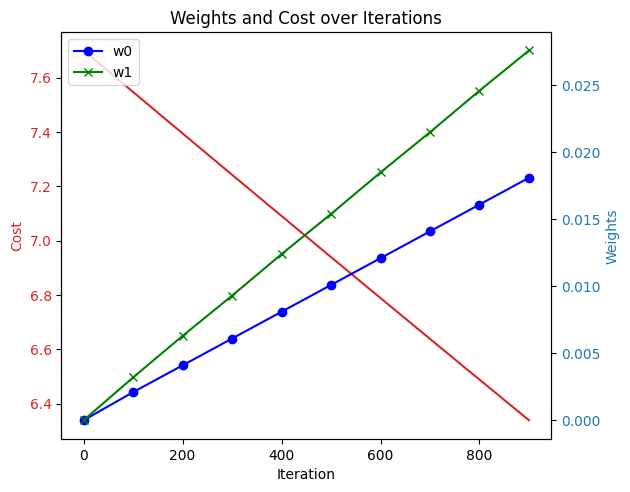

In [ ]:
import matplotlib.pyplot as plt

iterations = [i * 100 for i in range(10)]
w0 = [1.4e-06, 0.0021, 0.0041, 0.0061, 0.0081, 0.0101, 0.0121, 0.0141, 0.0161, 0.0181]
w1 = [4e-06, 0.0032, 0.0063, 0.0093, 0.0124, 0.0154, 0.0185, 0.0215, 0.0246, 0.0276]
cost = [7.6995, 7.5466, 7.3940, 7.2419, 7.0902, 6.9388, 6.7881, 6.6378, 6.4879, 6.3384]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost', color=color)
ax1.plot(iterations, cost, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Weights', color=color)
ax2.plot(iterations, w0, label='w0', color='blue', marker='o')
ax2.plot(iterations, w1, label='w1', color='green', marker='x')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Weights and Cost over Iterations')
ax2.legend(loc='upper left')

plt.show()


### 3. Vectorization


> Vectorization is a technique that performs operations on entire arrays or matrices in a single operation rather than looping through each element individually. Now, your task is to implement and to train the linear regression model, by using the vectorization. Your method skeleton will look a bit different now and you will need to rewrite them, by using the matrix methods covered last week.



#### 3.1. Linear Regression Cost Function
> This function takes three matrices as the parameters:


*   $ w $ (vector of weights, that contains slope and intercept for the independent variable)
*  $ x $ (matrix of input features - each row of $x$ corresponds to a single entry data point)
*  $ y $ (vector of each target value --> dependant variables)

> By using the matrix methods that we implemented last week, implement this cost function.

> **A bit of a tip**: To calculate the predicted values, use the matrix multiplication. To calculate the difference between actual and predicted values, use the diff method. The only thing left is to compute the square difference and divide it with the number of data points doubled.

In [ ]:
def linear_reg_cost(w, x, y):
    m = len(y)
    predictions = multiply(x, w)
    errors = subtract(predictions, y)
    squared_errors = vector_multiply(errors, errors)
    cost = sum(squared_errors) / (2 * m)
    return cost

def multiply(matrix, vector):
    result = [sum(x_i * w_i for x_i, w_i in zip(row, vector)) for row in matrix]
    return result

def subtract(v1, v2):
    result = [i - j for i, j in zip(v1, v2)]
    return result

def vector_multiply(v1, v2):
    result = [i * j for i, j in zip(v1, v2)]
    return result


x = [[row[0]] for row in data]
y = [row[1] for row in data]

w = [1, 2]
cost = linear_reg_cost(w, x, y)
print(cost)




64829649397.47872


#### 3.2. Linear Regression Delta Cost Function
> To calculate the vectorized gradient, **here is a hint**. Firstly compute the predicted values and the difference between the actual and predicted values. Next, transpose the input features ($x$) and perform matrix multiplication to calculate the weighted sum of feature errors. At the end, scale the result by the inverse of the number of data points ($m$), to obtain the average gradient.

In [ ]:
def linear_reg_delta_cost(w, x, y):
    m = len(y)
    predictions = multiply(x, w)
    errors = subtract(predictions, y)
    x_transpose = transpose_matrix(x)
    gradient = multiply(x_transpose, errors)
    gradient = scalar_multiply(1 / m, gradient)
    return gradient

def transpose_matrix(matrix):
    return list(map(list, zip(*matrix)))

def scalar_multiply(scalar, vector):
    return [scalar * x for x in vector]

x = [[row[0]] for row in data]
y = [row[1] for row in data]
w = [1, 2]


gradients = linear_reg_delta_cost(w, x, y)
print(gradients)

[-759588289.7659575]


#### 3.3. Training the Linear Regression Model

> As we mentioned above, the algorithm continuously adjusts the weights in a manner that moves them away from the direction where the cost function increases the most, aiming to approach the minimum of the cost function. This iterative process enables the algorithm to gradually refine the model's parameters, enhancing its ability to accurately capture the patterns in the data. The logic for this function stays the same as for the initial one; you will just need to adjust your code, to use the matrix methods, instead of writing the loops and iterating through elements. The function should return the optimized parameter $ w$ and the final cost.

In [ ]:
def train_linear_reg(x,
                     y,
                     w,
                     learning_rate = 0.0000004,
                     num_iterations = 1000,
                     logging = True):
  for iteration in range(num_iterations):
        cost = linear_reg_cost(w, x, y)
        gradients = linear_reg_delta_cost(w, x, y)
        w = subtract(w, scalar_multiply(learning_rate, gradients))
        if logging and iteration % 100 == 0:
            print(f"Iteration {iteration}: cost = {cost}")

  return w, cost

x = [[row[0]] for row in data]
y = [row[1] for row in data]

initial_w = [0, 0]
optimized_w, final_cost = train_linear_reg(x, y, initial_w)
print(f"Optimized: {optimized_w}")
print(f"Final cost: {final_cost}")

Iteration 0: cost = 65591548106.45744
Iteration 100: cost = 2397865723.593575
Iteration 200: cost = 2397865723.5932484
Iteration 300: cost = 2397865723.593249
Iteration 400: cost = 2397865723.593249
Iteration 500: cost = 2397865723.593249
Iteration 600: cost = 2397865723.593249
Iteration 700: cost = 2397865723.593249
Iteration 800: cost = 2397865723.593249
Iteration 900: cost = 2397865723.593249
Optimized: [165.38321789589932]
Final cost: 2397865723.5932484


3.4. Visualization & Plotting
> Additionally, you can try to plot and visualize the regression line alongside the data points.

Error


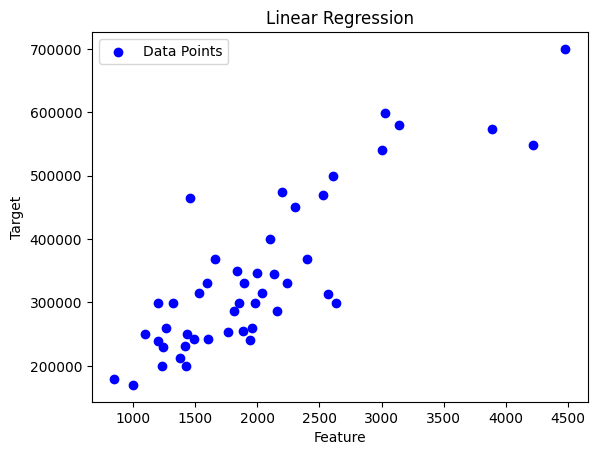

Optimized weights: [165.38321789589932]


In [ ]:
import matplotlib.pyplot as plt
x = [row[0] for row in data]
y = [row[1] for row in data]

plt.scatter(x, y, color='blue', label='Data Points')

try:
    if optimized_w:
        predicted_y = [optimized_w[0] + optimized_w[1] * xi for xi in x]
        plt.plot(x, predicted_y, color='red', label='Regression Line')
    else:
        print("Error")
except IndexError:
    print("Error")

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()

print("Optimized weights:", optimized_w)
